### Question 3
Consider the ‘Blood Pressure Before’ and ‘Blood Pressure After’ columns from the
data and calculate the following

In [58]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [59]:
# Reading data from csv file
data = pd.read_csv('data.csv')

#Printing first few rows from our data
data.head()

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140


In [60]:
#Prints name of column in our dataset
print(data.columns)

Index(['Patient ID', ' Blood Pressure Before (mmHg)',
       ' Blood Pressure After (mmHg)'],
      dtype='object')


In [61]:
#Removing extra spaces from our column
data.columns = data.columns.str.strip()

print(data.columns)

Index(['Patient ID', 'Blood Pressure Before (mmHg)',
       'Blood Pressure After (mmHg)'],
      dtype='object')


### A] Measure the dispersion in both and interpret the result

In [62]:
# Extract 'Blood Pressure Before' and 'Blood Pressure After' columns
bp_before = data['Blood Pressure Before (mmHg)']
bp_after = data['Blood Pressure After (mmHg)']

# Calculate range for both columns
range_before = np.ptp(bp_before)
range_after = np.ptp(bp_after)

# Calculate variance for both columns
variance_before = np.var(bp_before, ddof=1)
variance_after = np.var(bp_after, ddof=1)

# Print range, variance for both columns
print('Range before:', range_before)
print('Range after:', range_after)
print('Variance before:', variance_before)
print('Variance after:', variance_after)

Range before: 28
Range after: 23
Variance before: 43.53727272727272
Variance after: 47.44484848484848


### B] Calculate mean and 5% confidence interval and plot it in a graph

In [63]:
# Calculate mean for both columns
mean_before = np.mean(bp_before)
mean_after = np.mean(bp_after)

# Calculate standard error of the mean for both columns
sem_before = stats.sem(bp_before)
sem_after = stats.sem(bp_after)

# Calculate 95% confidence interval for both columns
confidence_interval_before = stats.t.interval(0.95, len(bp_before)-1, loc=mean_before, scale=sem_before)
confidence_interval_after = stats.t.interval(0.95, len(bp_after)-1, loc=mean_after, scale=sem_after)

# Print mean and confidence interval for both columns
print('Mean before:', mean_before)
print('Mean after:', mean_after)
print('Confidence interval before:', confidence_interval_before)
print('Confidence interval after:', confidence_interval_after)

Mean before: 133.91
Mean after: 128.36
Confidence interval before: (132.60075849172767, 135.21924150827232)
Confidence interval after: (126.99326697818071, 129.7267330218193)


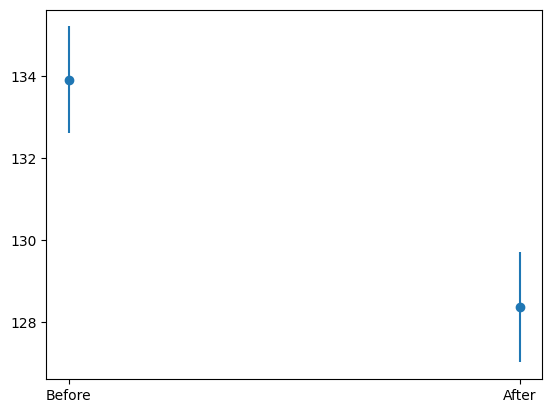

In [64]:
# Plot mean and confidence interval for both columns
plt.errorbar(['Before', 'After'], [mean_before, mean_after], yerr=[sem_before*1.96, sem_after*1.96], fmt='o')
plt.show()

### C] Calculate the Mean absolute deviation and Standard deviation and interpret the results.

In [65]:
# Calculate mean absolute deviation for both columns
mad_before = bp_before.mad()
mad_after = bp_after.mad()


# Calculate standard deviation for both columns
std_before = np.std(bp_before, ddof=1)
std_after = np.std(bp_after, ddof=1)

# Print mean absolute deviation and standard deviation for both columns
print('Mean absolute deviation before:', mad_before)
print('Mean absolute deviation after:', mad_after)
print('Standard deviation before:', std_before)
print('Standard deviation after:', std_after)


Mean absolute deviation before: 5.7118
Mean absolute deviation after: 5.9
Standard deviation before: 6.598278012275076
Standard deviation after: 6.888022102523226


#### Below is the analysis froom above result

The MAD before is 5.7118 and the MAD after is 5.9. This means that on average, the blood pressure readings before are 5.7118 units away from the mean blood pressure before, while the blood pressure readings after are 5.9 units away from the mean blood pressure after. The MAD after is slightly larger than the MAD before, indicating that the blood pressure readings after are slightly more spread out than the blood pressure readings before.

Similarly, the SD before is 6.598278012275076 and the SD after is 6.888022102523226. This means that on average, the blood pressure readings before are 6.598278012275076 units away from the mean blood pressure before, while the blood pressure readings after are 6.888022102523226 units away from the mean blood pressure after. The SD after is also slightly larger than the SD before, indicating that the blood pressure readings after are slightly more spread out than the blood pressure readings before.

### D] Calculate the correlation coefficient and check the significance of it at 1% level of significance

In [66]:
# Calculate correlation coefficient and p-value between the two columns
corr, p_value = stats.pearsonr(bp_before, bp_after)

# Check if correlation is significant at 1% level of significance
significant = p_value < 0.01

# Print correlation coefficient, p-value, and significance result
print('Correlation coefficient:', corr)
print('p-value:', p_value)
print('Significant at 1% level:', significant)

Correlation coefficient: 0.9779485966556019
p-value: 1.8097381433068578e-68
Significant at 1% level: True
